# 선형회귀를 위한 처리 진행
1. 변수 간 다중공선성 확인
2. 

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../data/dataset/코스피_이상치처리완.csv')

feature = df[df.columns[6:]]

df.head(2)

,Symbol,Name,결산월,회계년,주기,분식기업,매출총이익률(%),영업이익률(%),당기순이익률(%),자본금영업이익률(%),...,영업현금흐름/투자현금흐름(%),DSRI,GMI,AQI,SGI,DEPI,SGAI,LVGI,TATA,벤포드
0,A095570,AJ네트웍스,12,2015,Annual,0.0,100.0,7.03,2.75,183.57,...,1.43,1.03,1.0,0.81,1.04,0.18,1.01,0.96,0.10,0
1,A095570,AJ네트웍스,12,2016,Annual,0.0,100.0,4.93,1.36,132.12,...,2.19,1.13,1.0,1.28,1.19,0.17,1.02,1.03,0.12,0


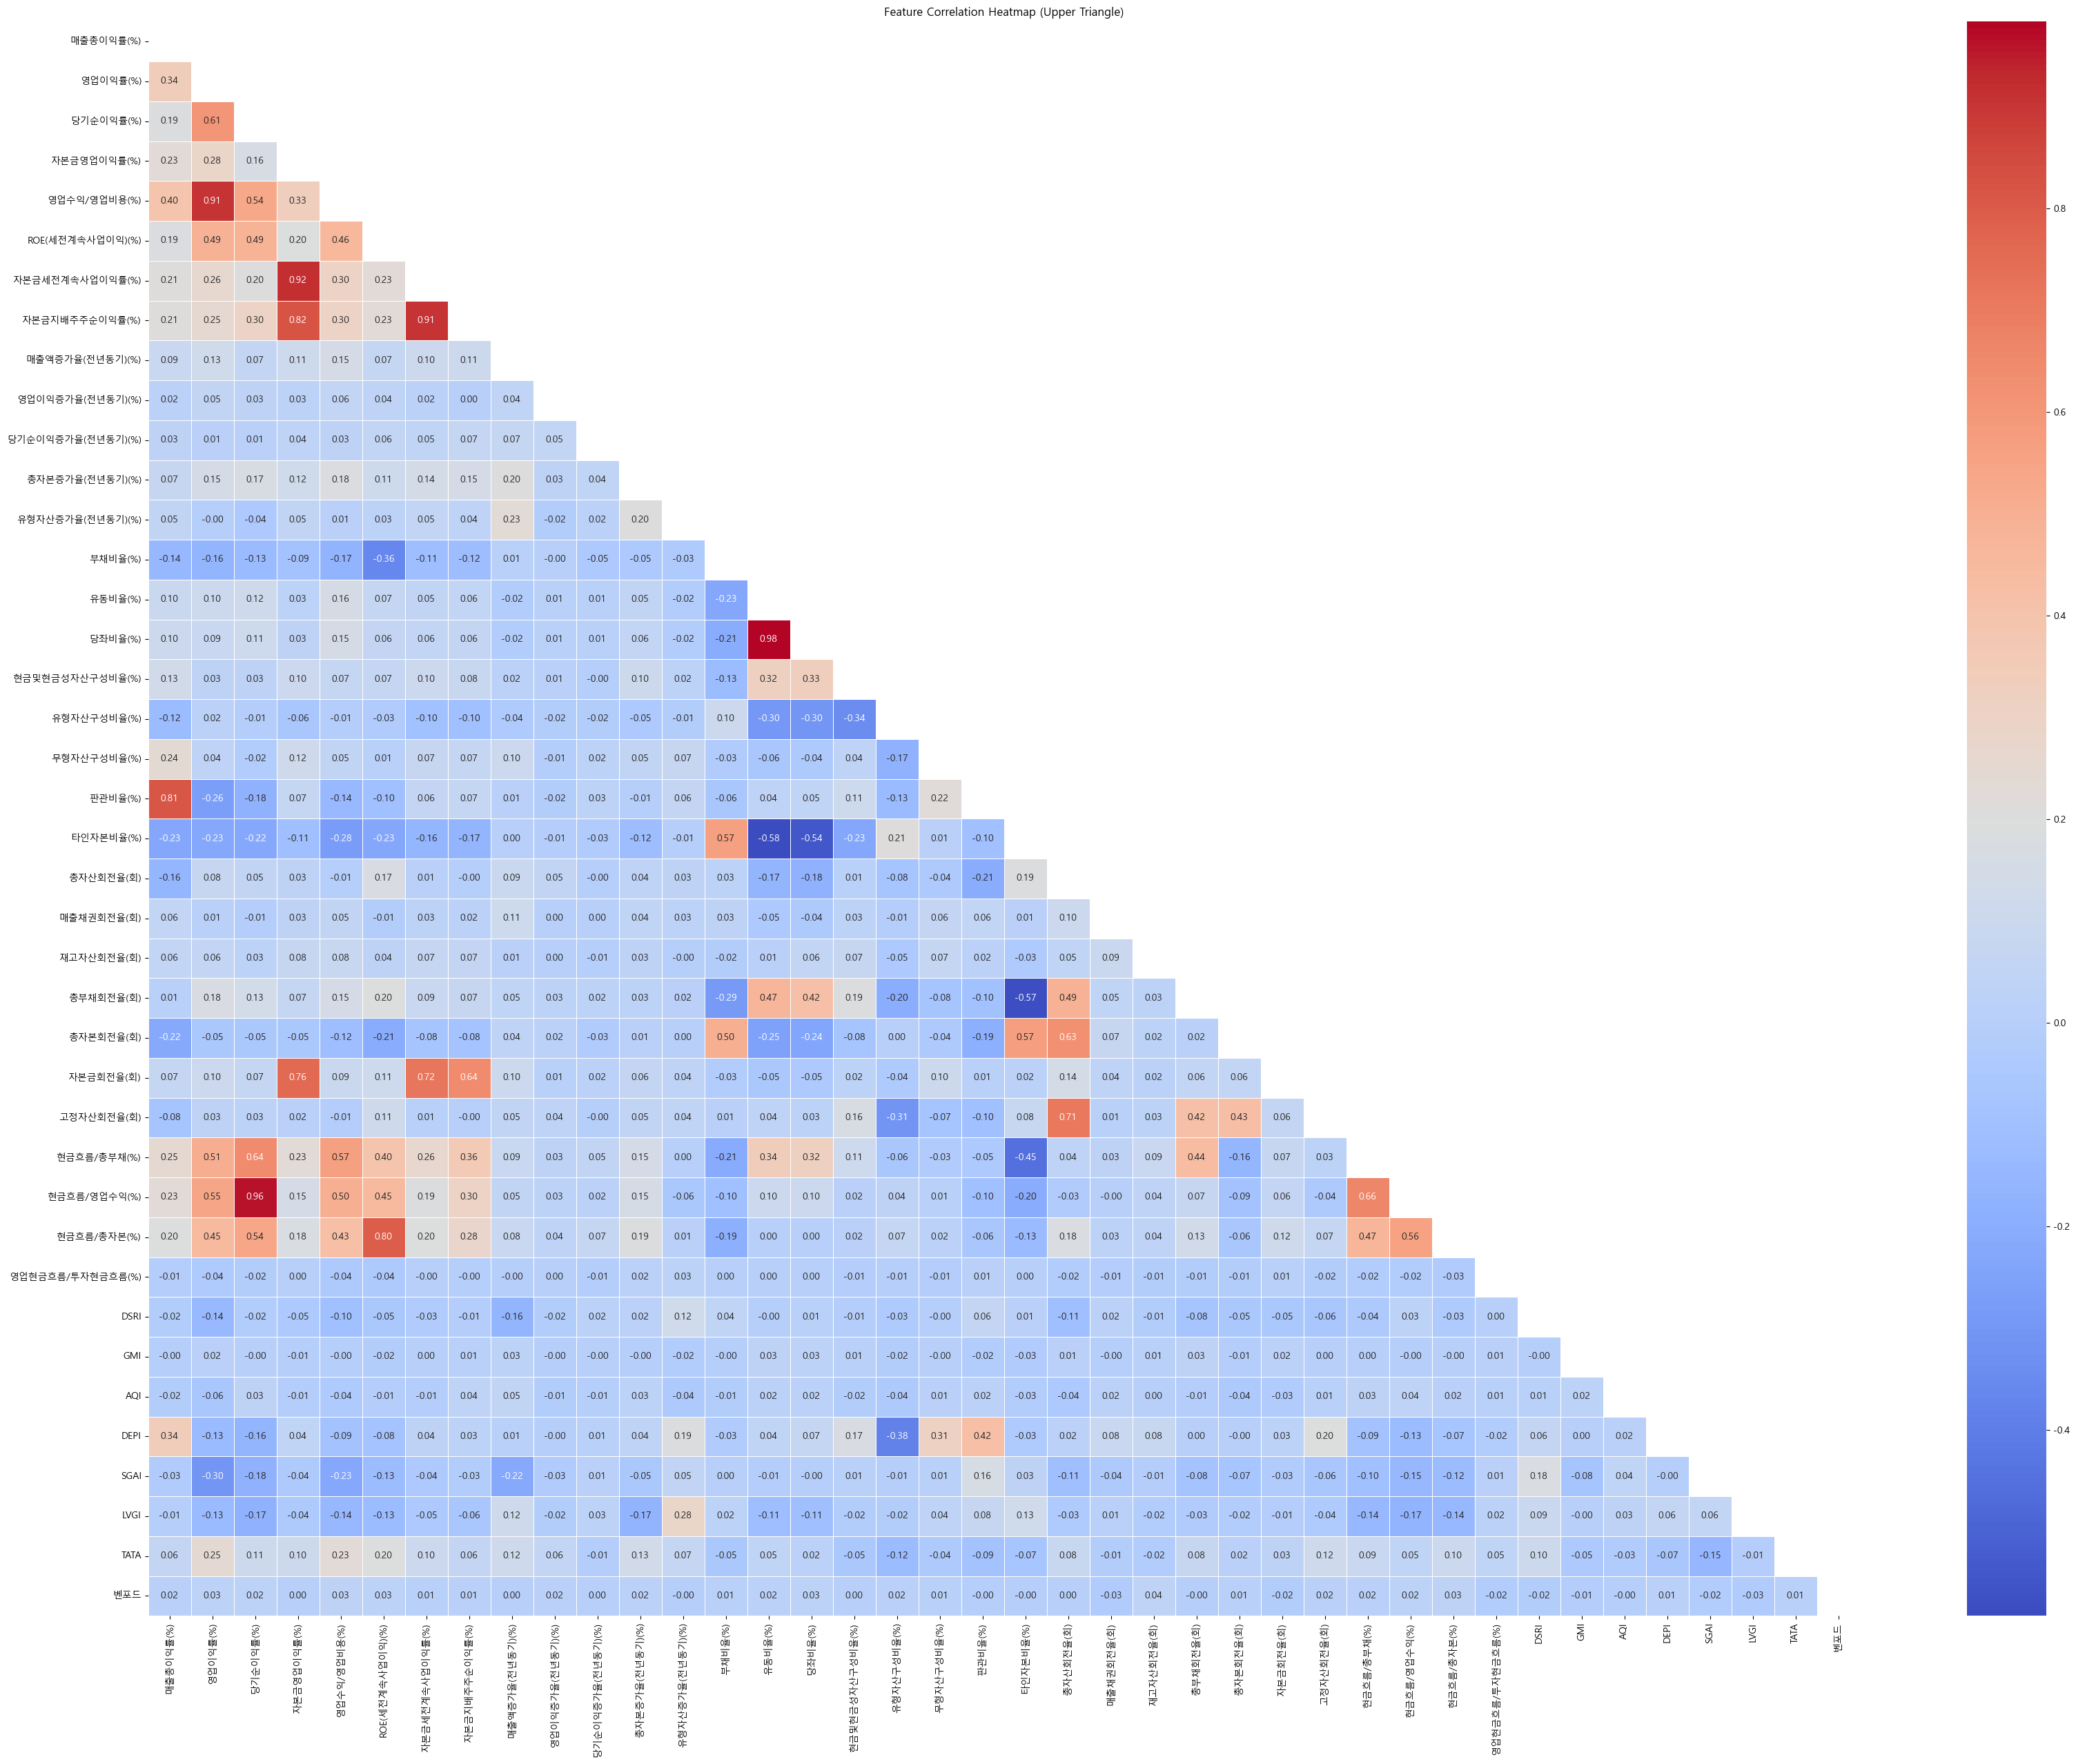

In [16]:
# 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 폰트 설정 (한글과 함께 사용시 깨질 수 있는 마이너스(-) 표시 해결)
plt.rcParams['axes.unicode_minus'] = False


# 상관관계 행렬 계산
corr_matrix = feature.corr()

# 마스크 생성 (대각선 아래쪽 부분을 True로 설정)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(40, 30))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Upper Triangle)")
plt.show()

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(feature):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(feature.values,i)
                        for i in range(feature.shape[1])]
    vif['Feature'] = feature.columns
    return vif 
    
feature_vif = feature.drop(columns='벤포드',axis=1)
vif=feature_engineering_XbyVIF(feature_vif)
vif.sort_values('VIF_Factor',ascending=False).reset_index(drop=True)

,VIF_Factor,Feature
0,1117.383496,SGI
1,769.622075,영업수익/영업비용(%)
2,369.932303,매출총이익률(%)
3,306.369939,판관비율(%)
4,158.021845,매출액증가율(전년동기)(%)
5,85.668781,영업이익률(%)
6,76.533940,유동비율(%)
7,61.100056,당좌비율(%)
8,28.886036,타인자본비율(%)
9,27.633882,총자산회전율(회)


In [13]:
feature.drop(columns='SGI', inplace=True)

C:\Users\Master\AppData\Local\Temp\ipykernel_16012\848857160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature.drop(columns='SGI', inplace=True)


In [14]:
feature_vif = feature.drop(columns='벤포드',axis=1)
vif=feature_engineering_XbyVIF(feature_vif)
vif.sort_values('VIF_Factor',ascending=False).reset_index(drop=True)

,VIF_Factor,Feature
0,360.536535,매출총이익률(%)
1,297.892114,판관비율(%)
2,79.436585,영업수익/영업비용(%)
3,76.082023,유동비율(%)
4,71.315210,영업이익률(%)
5,60.759196,당좌비율(%)
6,27.630771,총자산회전율(회)
7,27.362513,타인자본비율(%)
8,23.530858,현금흐름/영업수익(%)
9,21.415990,당기순이익률(%)


In [17]:
feature.drop(columns='현금흐름/영업수익(%)', inplace=True)

C:\Users\Master\AppData\Local\Temp\ipykernel_16012\3835413806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature.drop(columns='현금흐름/영업수익(%)', inplace=True)


In [18]:
feature_vif = feature.drop(columns='벤포드',axis=1)
vif=feature_engineering_XbyVIF(feature_vif)
vif.sort_values('VIF_Factor',ascending=False).reset_index(drop=True)

,VIF_Factor,Feature
0,357.232954,매출총이익률(%)
1,295.742885,판관비율(%)
2,79.229641,영업수익/영업비용(%)
3,75.990038,유동비율(%)
4,70.206842,영업이익률(%)
5,60.714445,당좌비율(%)
6,27.409067,총자산회전율(회)
7,27.314806,타인자본비율(%)
8,20.967004,LVGI
9,18.937967,SGAI


In [19]:
feature.drop(columns='매출총이익률(%)', inplace=True)

C:\Users\Master\AppData\Local\Temp\ipykernel_16012\2139806151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature.drop(columns='매출총이익률(%)', inplace=True)


In [20]:
feature_vif = feature.drop(columns='벤포드',axis=1)
vif=feature_engineering_XbyVIF(feature_vif)
vif.sort_values('VIF_Factor',ascending=False).reset_index(drop=True)

,VIF_Factor,Feature
0,79.179894,영업수익/영업비용(%)
1,75.973369,유동비율(%)
2,60.707576,당좌비율(%)
3,27.357969,총자산회전율(회)
4,27.290444,타인자본비율(%)
5,20.944291,LVGI
6,18.849611,SGAI
7,16.650484,총부채회전율(회)
8,15.714557,자본금세전계속사업이익률(%)
9,9.503512,자본금영업이익률(%)


In [21]:
feature.drop(columns='유동비율(%)', inplace=True)

C:\Users\Master\AppData\Local\Temp\ipykernel_16012\282586476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature.drop(columns='유동비율(%)', inplace=True)


In [22]:
feature_vif = feature.drop(columns='벤포드',axis=1)
vif=feature_engineering_XbyVIF(feature_vif)
vif.sort_values('VIF_Factor',ascending=False).reset_index(drop=True)

,VIF_Factor,Feature
0,77.132871,영업수익/영업비용(%)
1,27.266529,타인자본비율(%)
2,26.799187,총자산회전율(회)
3,20.916602,LVGI
4,18.843012,SGAI
5,15.710989,자본금세전계속사업이익률(%)
6,15.037036,총부채회전율(회)
7,9.502431,자본금영업이익률(%)
8,8.360852,자본금지배주주순이익률(%)
9,7.518074,총자본회전율(회)
